In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, tree 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/data 144 lab 5/train.csv")
display(train_dataset.head(10))
# print(train_dataset.shape)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/data 144 lab 5/test.csv")
test_dataset.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

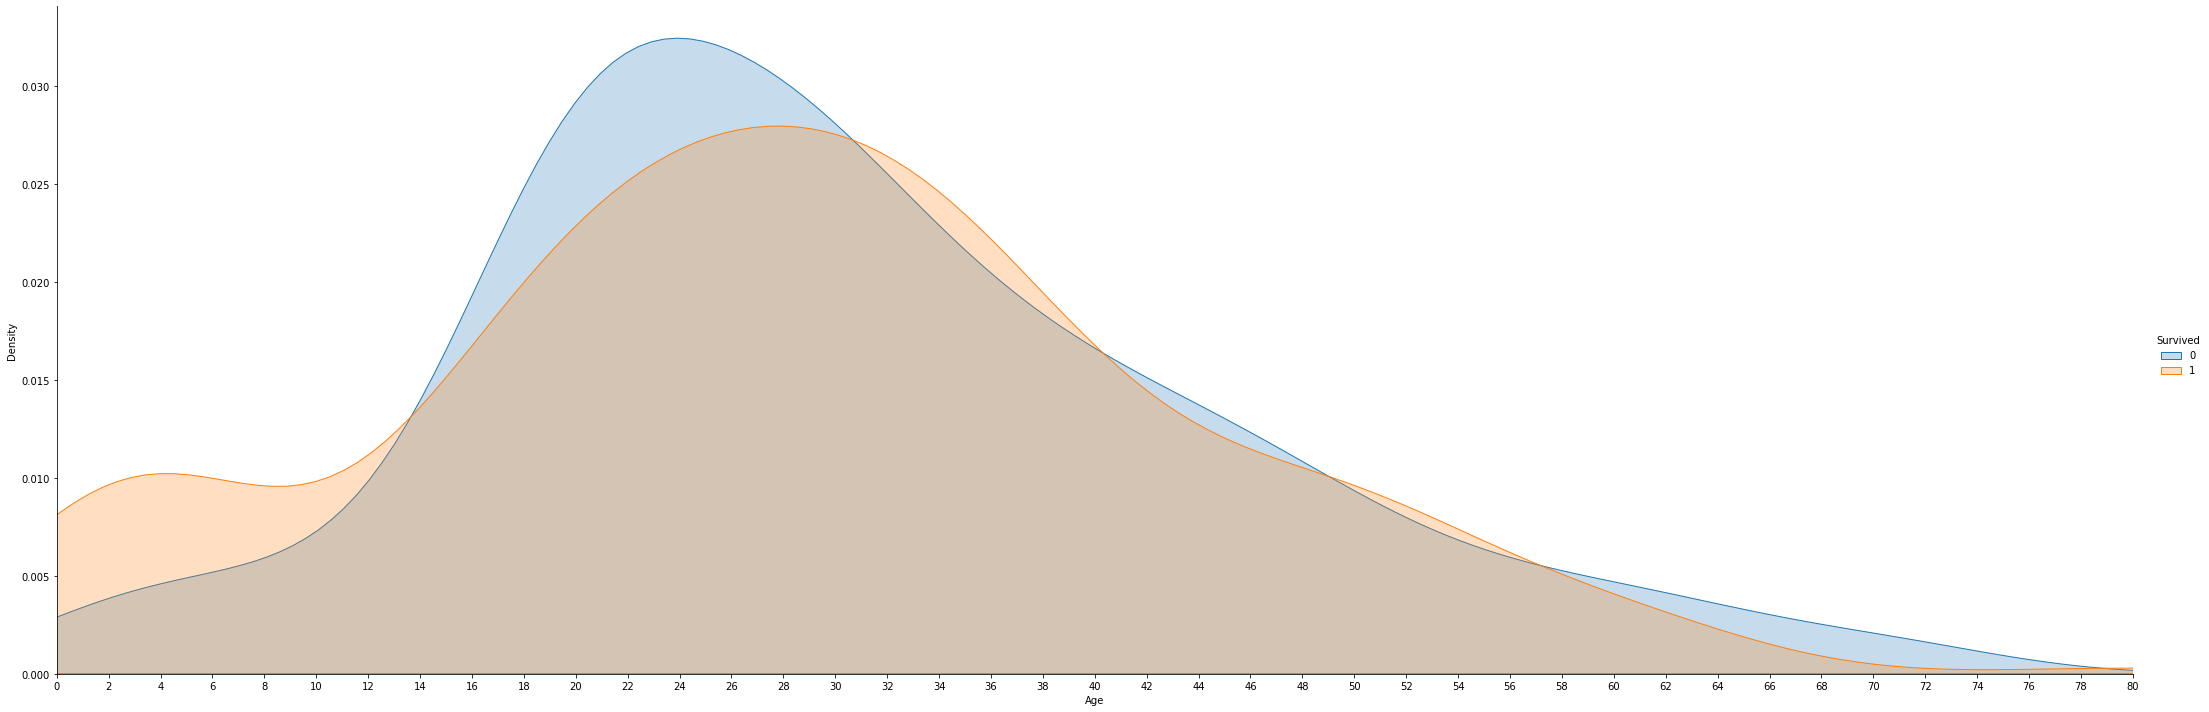

In [ ]:
import seaborn as sns
g = sns.FacetGrid(train_dataset, hue='Survived', height=10, aspect=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, train_dataset['Age'].max() + 1, 2), xlim=(0, train_dataset['Age'].max()))

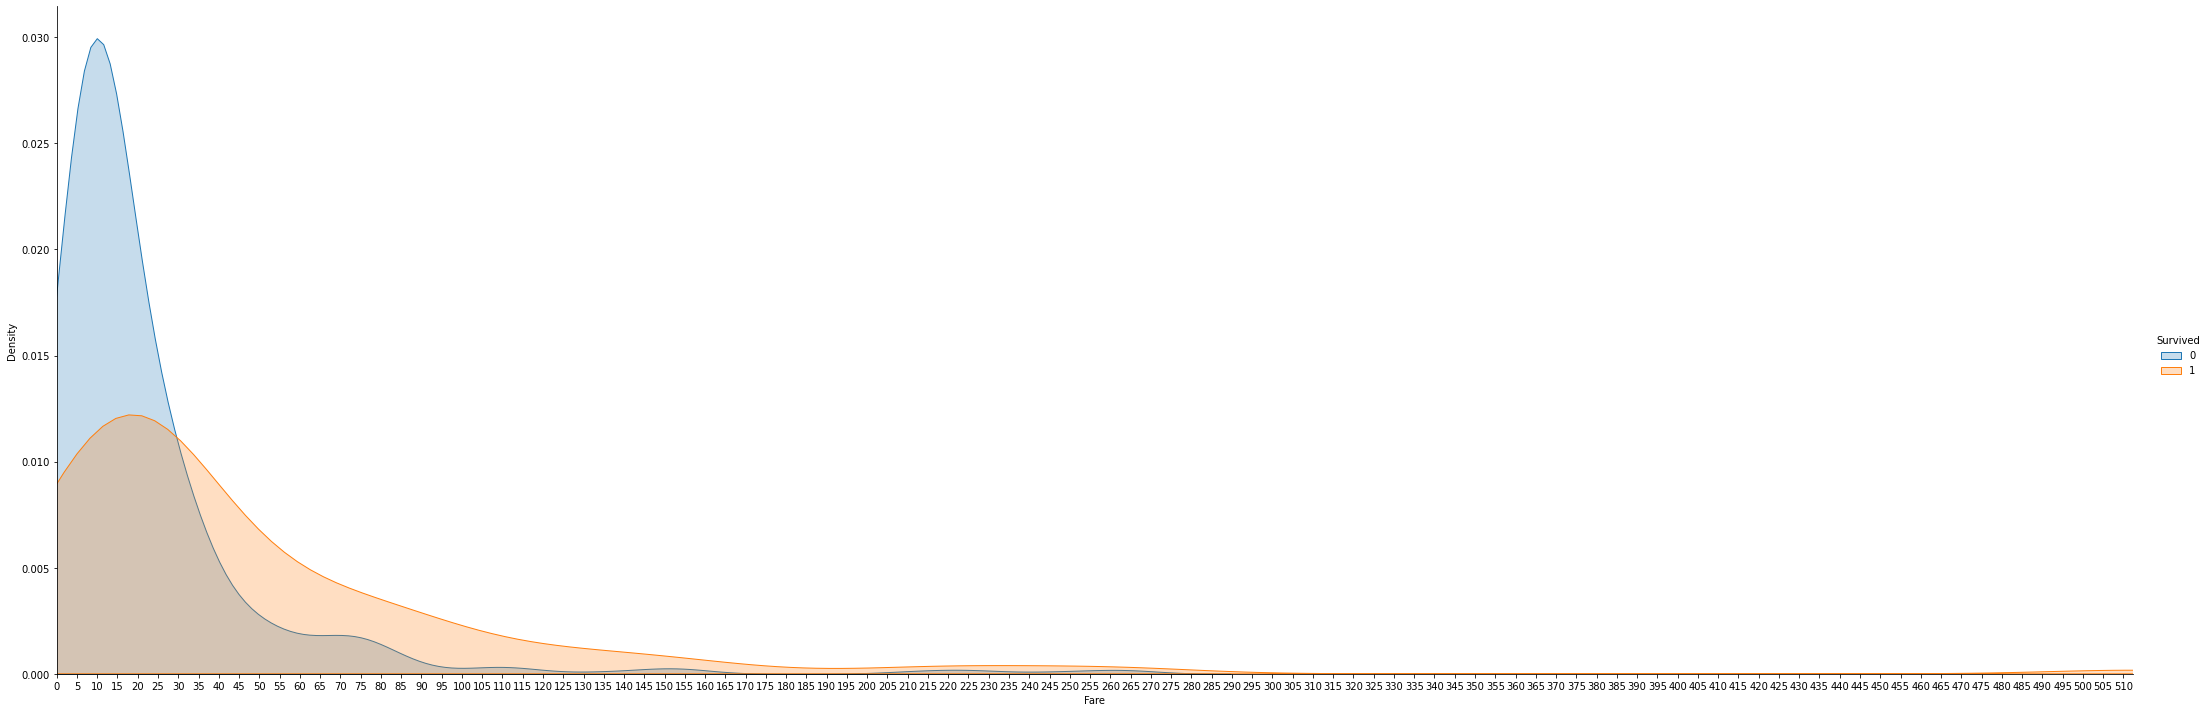

In [ ]:

g = sns.FacetGrid(train_dataset, hue='Survived', height=10, aspect=3)
g.map(sns.kdeplot, 'Fare', shade=True)
g.add_legend()
revised = train_dataset.copy()
revised['Fare'] = revised['Fare'].apply(np.floor)
g.set(xticks=np.arange(0, revised['Fare'].max() + 1, 5), xlim=(0, train_dataset['Fare'].max()))

In [ ]:
women_survived = train_dataset.query("Sex == 'female'")['Survived']
women_survived

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [ ]:
rate_of_women_survived = sum(women_survived)/len(women_survived)
print ("% of women survived: ", rate_of_women_survived)

% of women survived:  0.7420382165605095


In [ ]:
men_survived = train_dataset.query("Sex == 'male'")['Survived']
men_survived

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [ ]:
rate_of_men_survived = sum(men_survived)/len(men_survived)
print ("% of men survived: ", rate_of_men_survived)

% of men survived:  0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rsc
from itertools import combinations 
import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# y = train_dataset['Survived']

# features = ['Pclass', 'Sex', 'SibSp', 'Parch']
# X = pd.get_dummies(train_dataset[features])
# X_Test = pd.get_dummies(test_dataset[features])

# model = rsc(n_estimators = 100, max_depth = 5, random_state = 1)
# model.fit(X, y)
# predictions = model.predict(X_Test)

# output = pd.DataFrame({'PassengerId': test_dataset.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index = False)
# #print('Your submission was successfully saved!')
# print(output)


In [ ]:

train_dataset = train_dataset.fillna(0)
test_dataset = test_dataset.fillna(0)

test_dataset_copy = test_dataset.copy()
train_dataset_copy = train_dataset.copy()

train_dataset_copy = train_dataset_copy.drop(columns=['Name', 'Cabin', 'Ticket'])
test_dataset_copy = test_dataset_copy.drop(columns=['Name', 'Cabin', 'Ticket'])

train_dataset_copy['Embarked'] = train_dataset_copy['Embarked'].astype(str)
test_dataset_copy['Embarked'] = train_dataset_copy['Embarked'].astype(str)

# train_dataset_copy[train_dataset_copy.eq('inf').any(1)]
train_dataset.isnull().values.any()
# np.isinf(train_dataset_copy).values.sum()
# test_dataset_copy

False

In [ ]:
def encoder_fn(df):
  columns = np.array(df.columns)
  # columns
  # Identify categorical columns
  X = df
  # X
  columns = list(columns)
  # columns
  dtypes = X.dtypes
  # print(dtypes)
  filtered_columns = list(filter(lambda c: dtypes[c] == object,columns))
  # print(columns)
  # print(filtered_columns)
  # # Use labelEncoder to transform the data
  le = preprocessing.LabelEncoder()
  # Get list of unique labels for each column
  for c in filtered_columns:
    uniques = np.unique(X[c])
    # print (c)
    # print(uniques)
    le.fit(np.array(X[c]))
    target = le.fit_transform(X[c])
    X[f"encode_{c}"] = target
  #   # print(f"C: {c}, target: {target}")
  # # X
  encoded_X = X.drop(columns = filtered_columns)
  # # display(encoded_X)
  return encoded_X

test_dataset_copy = encoder_fn(test_dataset_copy)
train_dataset_copy = encoder_fn(train_dataset_copy)
# test_dataset_copy

In [ ]:
def log_fn(df, columns):
  for col in columns:
    df['log' + col] = np.log(df[col])
  return df

train_dataset_copy = log_fn(train_dataset_copy, ['Fare'])
test_dataset_copy = log_fn(test_dataset_copy, ['Fare'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def classfier_fn(column_1, columns, train_d, test_d):
  y = np.array(train_d[column_1])
  # features = columns
  # X = pd.get_dummies(train_d[features])
  # X_test = pd.get_dummies(test_d[features])
  model = rsc(n_estimators = 100, max_depth = 5, random_state = 42)
  model.fit(train_d, y)
  predictions = model.predict(test_d)
  # return predictions
  accuracy = accuracy_score(np.array(test_d[column_1]), predictions)
  return accuracy
# surv = np.array(train_dataset_copy['PassengerId'])
# surv

In [ ]:
train_data, test_data = train_test_split(train_dataset_copy)
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


In [ ]:
#if we don't fix, don't include this cell in final submission


# from sklearn.feature_extraction import DictVectorizer
# train_data, test_data = train_test_split(train_dataset_copy)
# train_data.dropna()
# test_data.dropna()
# train_data.replace([np.inf, -np.inf], 0, inplace=True)
# test_data.replace([np.inf, -np.inf], 0, inplace=True)
# # train_data.isnull().values.any()
# # test_data.isnull().values.any()
# vec = DictVectorizer()
# train_data = vec.fit_transform(train_data).toarray()
# test_data = vec.fit_transform(test_data).toarray()

# columns = np.array(train_data.columns)
# # deleted_columns = ['Survived']
# columns = columns[columns != 'Survived']
# # columns = columns[columns != 'Age']
# iter_columns = list(itertools.chain.from_iterable(itertools.combinations(columns, r) for r in range(len(columns)+1)))
# iter_columns = iter_columns[10:]
# iter_columns
# accuracies = {}
# for col in iter_columns:
#   print("col: ", col)
#   accuracy = classfier_fn('Survived', list(col), train_data , test_data)
#   accuracies[col] = accuracy
# accuracies
# #print(max(accuracies, key=accuracies.get))
# # # # train_dataset[['PassengerId', 'Pclass']]
# # # # test_dataset
# # # # train_dataset
# # # #pd.get_dummies(train_dataset)

# # prediction = classfier_fn('Survived', ['Age', 'SibSp', 'Parch', 'Sex'], train_dataset , test_dataset)
# # output = pd.DataFrame({'PassengerId': test_dataset.PassengerId, 'Survived': prediction})
# # output.to_csv('my_submission.csv', index = False)
# # output

In [ ]:
def classfier_fn(column_1, columns, train_d, test_d):
  y = np.array(train_d[column_1])
  # features = columns
  # X = pd.get_dummies(train_d[features])
  # X_test = pd.get_dummies(test_d[features])
  model = rsc(n_estimators = 100, max_depth = 5, random_state = 42)
  model.fit(train_d[columns], y)
  predictions = model.predict(test_d[columns])
  return predictions
  # accuracy = accuracy_score(np.array(test_d[column_1]), predictions)
  # return accuracy

In [ ]:
#####.  SAHIL'S WORK ##########
#####.  PLEASE DONT CHANGE IT ########
train_data, test_data = train_test_split(train_dataset_copy)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)
# train_data = train_data.dropna()
# test_data = test_data.dropna()
train_data.replace([np.inf, -np.inf],0, inplace=True)
test_data.replace([np.inf, -np.inf],0, inplace=True)

# columns = np.array(train_data.columns)
# for col in columns:
#   print(col, np.unique(train_data[col]))
# deleted_columns = ['Survived']
# columns = columns[columns != 'Survived']
# # columns = columns[columns != 'Age']
# iter_columns = list(itertools.chain.from_iterable(itertools.combinations(columns, r) for r in range(len(columns)+1)))
# iter_columns = iter_columns[10:]
# # iter_columns
# accuracies = {}
# for col in iter_columns:
#   # print("col: ", col)
#   accuracy = classfier_fn('Survived', list(col), train_data , test_data)
#   accuracies[col] = accuracy
# print(accuracies)
# print(max(accuracies, key=accuracies.get))
# prediction = classfier_fn('Survived', ['Pclass', 'Age', 'SibSp', 'Parch', 'encode_Sex', 'encode_Embarked'], train_dataset_copy , test_dataset_copy)
# output = pd.DataFrame({'PassengerId': test_dataset_copy.PassengerId, 'Survived': prediction})
# output.to_csv('my_submission.csv', index = False)
# output

In [ ]:
from sklearn.neural_network import MLPClassifier
def better_accuracy_score_fn(df_tr, df_te, columns, column_1):
  # X_train = df_tr.loc[:, columns]
  # X_test = df_te.loc[:, columns]
  y = np.array(df_tr[column_1])
  y_test = np.array(df_te[column_1])
  accuracies = None
  acc_flag = False
  activations, solvers, learning_rates = ['identity', 'logistic', 'tanh', 'relu'], ['lbfgs', 'sgd', 'adam'], ['constant', 'invscaling', 'adaptive']
  columns = np.array(df_tr.columns)
  # for col in columns:
    # print(col, np.unique(train_data[col]))
  # deleted_columns = ['Survived']
  columns = columns[columns != 'Survived']
  # columns = columns[columns != 'Age']
  iter_columns = list(itertools.chain.from_iterable(itertools.combinations(columns, r) for r in range(len(columns)+1)))
  iter_columns = iter_columns[10:]
  for col in iter_columns:
    for activation in activations:
      for solver in solvers:
        for learning_rate in learning_rates:
          clf = MLPClassifier(hidden_layer_sizes=(10,10), activation=activation, solver=solver, random_state = 1, learning_rate=learning_rate)
          clf.fit(df_tr.loc[:, col], y)
          test_predictions = clf.predict(df_te.loc[:, col])
          accuracy = accuracy_score(test_predictions, y_test)
          if not acc_flag:
            accuracies = np.array([activation, solver, learning_rate, accuracy, col])
            acc_flag = True
          else:
            accuracies = np.vstack([accuracies, np.array([activation, solver, learning_rate, accuracy, col])])
          # print(f"{activation}, {solver}, {learning_rate}, {accuracy}")
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    accuracy_df = pd.DataFrame(data=accuracies, columns=["activation", "solver", "learning_rate", "accuracy", col])
  display(accuracy_df)
  return accuracy_df.loc[accuracy_df["accuracy"] == accuracy_df["accuracy"].max()]
better_accuracy_score_fn(train_data, test_data, np.array(train_data.columns), ['Survived'] )

Streaming output truncated to the last 5000 lines.
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

activation solver learning_rate  accuracy  \
0       identity  lbfgs      constant  0.618834   
1       identity  lbfgs    invscaling  0.618834   
2       identity  lbfgs      adaptive  0.618834   
3       identity    sgd      constant  0.618834   
4       identity    sgd    invscaling   0.61435   
5       identity    sgd      adaptive  0.618834   
6       identity   adam      constant  0.623318   
7       identity   adam    invscaling  0.623318   
8       identity   adam      adaptive  0.623318   
9       logistic  lbfgs      constant  0.632287   
10      logistic  lbfgs    invscaling  0.632287   
11      logistic  lbfgs      adaptive  0.632287   
12      logistic    sgd      constant  0.618834   
13      logistic    sgd    invscaling  0.618834   
14      logistic    sgd      adaptive  0.618834   
15      logistic   adam      constant  0.618834   
16      logistic   adam    invscaling  0.618834   
17      logistic   adam      adaptive  0.618834   
18          tanh  lbfgs      constant  0.636771   
19          tanh  lbfgs    invscaling  0.636771   
20          tanh  lbfgs      adaptive  0.636771   
21          tanh    sgd      constant  0.618834   
22          tanh    sgd    invscaling  0.618834   
23          tanh    sgd      adaptive  0.618834   
24          tanh   adam      constant  0.618834   
25          tanh   adam    invscaling  0.618834   
26          tanh   adam      adaptive  0.618834   
27          relu  lbfgs      constant  0.618834   
28          relu  lbfgs    invscaling  0.618834   
29          relu  lbfgs      adaptive  0.618834   
30          relu    sgd      constant  0.618834   
31          relu    sgd    invscaling  0.618834   
32          relu    sgd      adaptive  0.618834   
33          relu   adam      constant  0.618834   
34          relu   adam    invscaling  0.618834   
35          relu   adam      adaptive  0.618834   
36      identity  lbfgs      constant  0.618834   
37      identity  lbfgs    invscaling  0.618834   
38      identity  lbfgs      adaptive  0.618834   
39      identity    sgd      constant  0.618834   
40      identity    sgd    invscaling  0.484305   
41      identity    sgd      adaptive  0.618834   
42      identity   adam      constant  0.618834   
43      identity   adam    invscaling  0.618834   
44      identity   adam      adaptive  0.618834   
45      logistic  lbfgs      constant  0.618834   
46      logistic  lbfgs    invscaling  0.618834   
47      logistic  lbfgs      adaptive  0.618834   
48      logistic    sgd      constant  0.618834   
49      logistic    sgd    invscaling  0.618834   
50      logistic    sgd      adaptive  0.618834   
51      logistic   adam      constant  0.618834   
52      logistic   adam    invscaling  0.618834   
53      logistic   adam      adaptive  0.618834   
54          tanh  lbfgs      constant  0.618834   
55          tanh  lbfgs    invscaling  0.618834   
56          tanh  lbfgs      adaptive  0.618834   
57          tanh    sgd      constant  0.618834   
58          tanh    sgd    invscaling  0.618834   
59          tanh    sgd      adaptive  0.618834   
60          tanh   adam      constant  0.618834   
61          tanh   adam    invscaling  0.618834   
62          tanh   adam      adaptive  0.618834   
63          relu  lbfgs      constant  0.618834   
64          relu  lbfgs    invscaling  0.618834   
65          relu  lbfgs      adaptive  0.618834   
66          relu    sgd      constant  0.618834   
67          relu    sgd    invscaling  0.618834   
68          relu    sgd      adaptive  0.618834   
69          relu   adam      constant  0.618834   
70          relu   adam    invscaling  0.618834   
71          relu   adam      adaptive  0.618834   
72      identity  lbfgs      constant  0.618834   
73      identity  lbfgs    invscaling  0.618834   
74      identity  lbfgs      adaptive  0.618834   
75      identity    sgd      constant  0.618834   
76      identity    sgd    invscaling  0.623318   
77      identity    sgd     

activation solver learning_rate  accuracy  \
17550       tanh  lbfgs      constant  0.843049   
17551       tanh  lbfgs    invscaling  0.843049   
17552       tanh  lbfgs      adaptive  0.843049   

      (PassengerId, Pclass, Age, SibSp, Parch, Fare, encode_Sex, encode_Embarked, logFare)  
17550  (Pclass, Age, SibSp, Parch, encode_Sex, encode...                                    
17551  (Pclass, Age, SibSp, Parch, encode_Sex, encode...                                    
17552  (Pclass, Age, SibSp, Parch, encode_Sex, encode...

In [ ]:
# Emily's work
from sklearn.ensemble import RandomForestClassifier as rsc
train_data_1, test_data_1 = train_test_split(train_dataset_copy)

train_data_1.dropna()
test_data_1.dropna()
train_data_1.replace([np.inf, -np.inf], 0, inplace=True)
test_data_1.replace([np.inf, -np.inf], 0, inplace=True)

vec = DictVectorizer()
train_data = vec.fit_transform(train_data).toarray()
test_data = vec.fit_transform(test_data).toarray()
features = ['Pclass', 'encode_Sex', 'SibSp', 'Parch']
X_train = pd.get_dummies(train_data_1[features])
X_test = pd.get_dummies(test_data_1[features])
Y_train = train_data_1['Survived']
Y_test = test_data_1['Survived']

model = rsc(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(accuracy_score(Y_test, predictions))
output = pd.DataFrame({'PassengerId': test_dataset.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index = False)
#print('Your submission was successfully saved!')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


NameError: ignored

In [ ]:
print(train_dataset_copy.columns)
def best_accuracy_fn(df_tr, df_te, columns, column_1):
  X_train = df_tr.loc[:, columns]
  X_test = df_te.loc[:, columns]
  y = np.array(df_tr[column_1])
  # y_test = np.array(df_te[column_1])
  clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='tanh', solver='lbfgs', random_state = 1, learning_rate = 'adaptive')
  clf.fit(X_train, y)
  test_predictions = clf.predict(X_test)
  return test_predictions
  # accuracy = accuracy_score(test_predictions, y_test)
  # return accuracy
train_dataset_copy.replace([np.inf, -np.inf], 0, inplace=True)
test_dataset_copy.replace([np.inf, -np.inf], 0, inplace=True)
prediction = best_accuracy_fn(train_dataset_copy, test_dataset_copy, ['Age', 'encode_Sex', 'logFare', 'SibSp'], ['Survived'])
# prediction
output = pd.DataFrame({'PassengerId': test_dataset_copy.PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index = False)
output

In [ ]:
train_data_1, test_data_1 = train_test_split(train_dataset_copy, test_size=0.33, random_state=42)

train_data_1.dropna()
test_data_1.dropna()
train_data_1.replace([np.inf, -np.inf], 0, inplace=True)
test_data_1.replace([np.inf, -np.inf], 0, inplace=True)
features = ['Pclass', 'encode_Sex', 'SibSp', 'Parch']
train_data_1[features]

In [1]:
x = '17.0'
type(x)

str